## Tasks and Classes


### Sub-task A :-
Aggression Identification Shared Task. The task will be to develop a classifier that could make a 3-way classification in between ‘Overtly Aggressive’, ‘Covertly Aggressive’ and ‘Non-aggressive’ text data. We are making available a dataset of 5,000 aggression-annotated data from social media each in Bangla (in both Roman and Bangla script), Hindi (in both Roman and Devanagari script) and English for training and validation. We will release additional data for testing your system. The train and test sets for the tasks are different from the ones made available during TRAC - 1.

### Sub-task B :-
Misogynistic Aggression Identification Shared Task: This task will be to develop a binary classifier for classifying the text as ‘gendered’ or ‘non-gendered’. We will provide a dataset of 5,000 annotated data from social media each in Bangla (in both Roman and Bangla script), Hindi (in both Roman and Devanagari script) and English for training and validation. We will release additional data for testing your system.

* **(HATE) Hate speech** :- Posts under this class contain Hate speech content.
* **(OFFN) Offenive** :- Posts under this class contain offensive content.
* **(PRFN) Profane** :- These posts contain profane words.


#### HATE SPEECH
Describing negative attributes or deficiencies to groups of individuals because they are members of a group (e.g. all poor people are stupid). Hateful comment toward groups because of race, political opinion, sexual orientation, gender, social status, health condition or similar.

#### OFFENSIVE
Posts which are degrading, dehumanizing,insulting an individual,threatening with violent acts are categorized into OFFENSIVE category.

#### PROFANITY
Unacceptable language in the absence of insults and abuse. This typically concerns the usage of swearwords (Scheiße, Fuck etc.) and cursing (Zur Hölle! Verdammt! etc.) are categorized into this category.
We expect most posts to be OTHER, some to be HATE and the other two categories to be less frequent. Dubious cases which are difficult to decide even for humans, should be left out.


### Sub-task C :-
Sub-task c will check the type of offense. Only posts labeled as HOF in sub-task A are included in sub-task C. The two categories in sub-task C are the following: 

* **Targeted Insult (TIN)**: Posts containing an insult/threat to an individual, group, or others.
* **Untargeted (UNT)**: Posts containing nontargeted profanity and swearing. Posts with general profanity are not targeted, but they contain non-acceptable language.
The multilingual HASOC Corpus will be sampled from Facebook and Twitter and distributed in tab separated format. Participants are allowed to use external resources and other datasets for this task. Dataset will be prepared in 3 languages (German, English and code-mixed hindi).

The size of Training data corpus is approximately 8000 posts for each language and Test data is approximately 1000 posts for the each language. Classification systems in all tasks will be evaluated using either macro-averaged F1-score or weighted F1-score.

In [0]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as sk_metrics
from sklearn.pipeline import Pipeline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
%env TRAC_PATH /content/gdrive/My Drive/TRAC/

env: TRAC_PATH=/content/gdrive/My Drive/TRAC/


In [5]:
%%bash 
echo "${TRAC_PATH}"
ls -ltrh "${TRAC_PATH}/data"
realpath "${TRAC_PATH}"
ls -ltrh "${TRAC_PATH}"/data/**/*

/content/gdrive/My Drive/TRAC/
total 16K
drwx------ 2 root root 4.0K Mar  7 06:27 iben
drwx------ 2 root root 4.0K Mar  7 06:27 raw
drwx------ 2 root root 4.0K Mar  7 06:27 hin
drwx------ 2 root root 4.0K Mar  7 06:27 eng
/content/gdrive/My Drive/TRAC
-rw------- 1 root root 389K Mar  7 06:27 /content/gdrive/My Drive/TRAC//data/iben/trac2_iben_train.csv
-rw------- 1 root root  93K Mar  7 06:27 /content/gdrive/My Drive/TRAC//data/iben/trac2_iben_dev.csv
-rw------- 1 root root 1.3K Mar  7 06:27 /content/gdrive/My Drive/TRAC//data/iben/README.txt
-rw------- 1 root root 1.3K Mar  7 06:27 /content/gdrive/My Drive/TRAC//data/hin/README.txt
-rw------- 1 root root 127K Mar  7 06:27 /content/gdrive/My Drive/TRAC//data/eng/trac2_eng_dev.csv
-rw------- 1 root root 499K Mar  7 06:27 /content/gdrive/My Drive/TRAC//data/eng/trac2_eng_train.csv
-rw------- 1 root root 511K Mar  7 06:27 /content/gdrive/My Drive/TRAC//data/hin/trac2_hin_train.csv
-rw------- 1 root root 126K Mar  7 06:27 /content/gdrive/M

bash: line 5: syntax error near unexpected token `('
bash: line 5: `BASE_PATH = os.environ.get("TRAC_PATH")'


In [10]:
BASE_PATH = os.environ.get("TRAC_PATH")

DATA_PATHS_TRAIN = {
    "EN": f"{BASE_PATH}/data/raw/train/trac2_eng_train.csv",
    "IBE": f"{BASE_PATH}/data/raw/train/trac2_iben_train.csv",
    "HI": f"{BASE_PATH}/data/raw/train/trac2_hin_train.csv"
}
DATA_PATHS_DEV = {
    "EN": f"{BASE_PATH}/data/raw/dev/trac2_eng_dev.csv",
    "IBE": f"{BASE_PATH}/data/raw/dev/trac2_iben_dev.csv",
    "HI": f"{BASE_PATH}/data/raw/dev/trac2_hin_dev.csv"
}
DATA_PATHS_TEST = {
    "EN": f"{BASE_PATH}/data/raw/test/trac2_eng_test.csv",
    "IBE": f"{BASE_PATH}/data/raw/test/trac2_iben_test.csv",
    "HI": f"{BASE_PATH}/data/raw/test/trac2_hin_test.csv"
}

#print(DATA_PATHS_DEV)

DATA_COLUMNS = ["row_id", "text", "task_1", "task_2"]

NUM_LANGUAGES = len(DATA_PATHS_TRAIN)
print(NUM_LANGUAGES)
TASK_LABEL_IDS = {
    "Sub-task A": ["OAG", "NAG", "CAG"],
    "Sub-task B": ["GEN", "NGEN"]
}


3


In [11]:
df = pd.read_csv(DATA_PATHS_TRAIN["EN"], sep=",").fillna("NULL")
df.head()

,ID,Text,Sub-task A,Sub-task B
0,C45.451,Next part,NAG,NGEN
1,C47.11,Iii8mllllllm\nMdxfvb8o90lplppi0005,NAG,NGEN
2,C33.79,🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...,NAG,NGEN
3,C4.1961,What the fuck was this? I respect shwetabh and...,NAG,NGEN
4,C10.153,Concerned authorities should bring arundathi R...,NAG,NGEN


train
Index(['ID', 'Text', 'Sub-task A', 'Sub-task B'], dtype='object')
Index(['ID', 'Text', 'Sub-task A', 'Sub-task B'], dtype='object')
Index(['ID', 'Text', 'Sub-task A', 'Sub-task B'], dtype='object')
dev
Index(['ID', 'Text', 'Sub-task A', 'Sub-task B'], dtype='object')
Index(['ID', 'Text', 'Sub-task A', 'Sub-task B'], dtype='object')
Index(['ID', 'Text', 'Sub-task A', 'Sub-task B'], dtype='object')


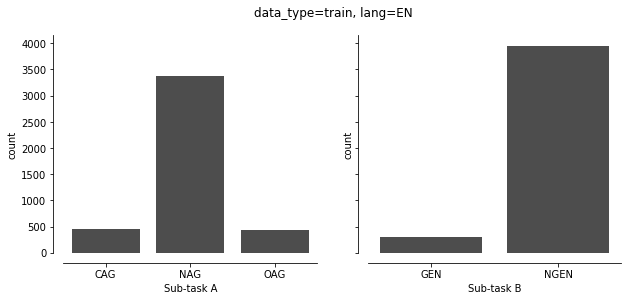

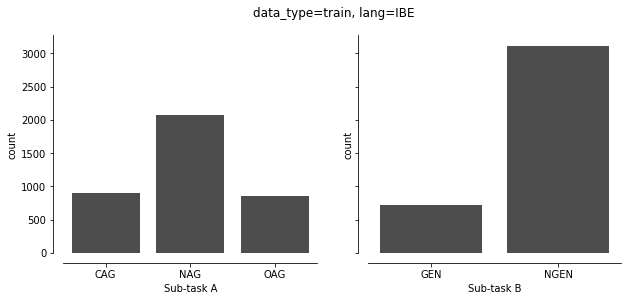

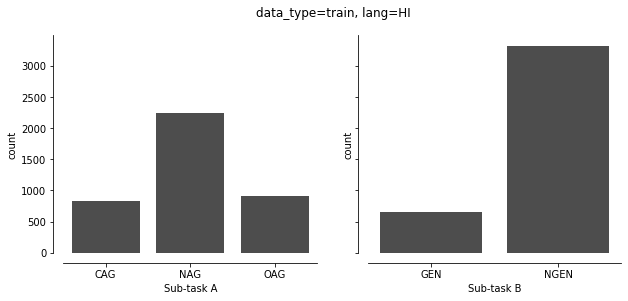

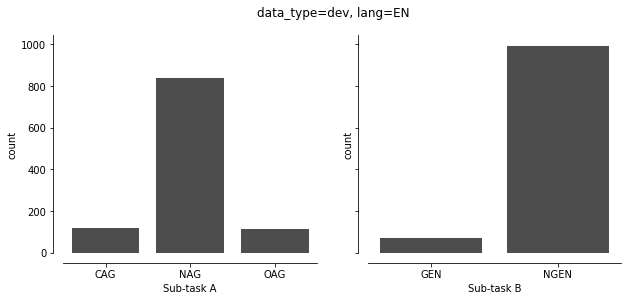

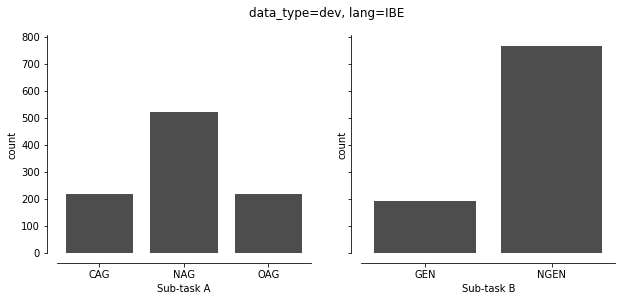

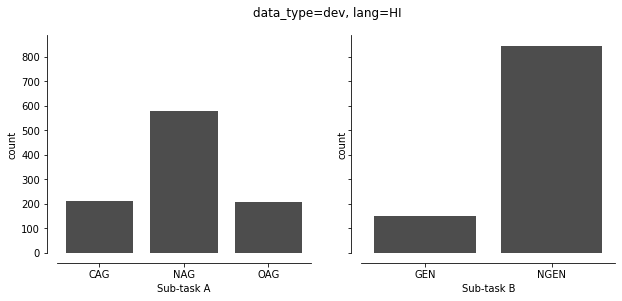

In [12]:
for data_type, DATA_PATHS in [("train", DATA_PATHS_TRAIN), ("dev", DATA_PATHS_DEV)]:
    print(data_type)
    for lang, path in DATA_PATHS.items():
        df = pd.read_csv(path, sep=",").fillna("NULL")
        task_cols = df.filter(regex=r'Sub-task*', axis=1).columns
        print(df.columns)
        n_cols = len(task_cols)
        fig, ax = plt.subplots(1, n_cols, sharey=True, figsize=(5*n_cols, 4))
        for axi, task in zip(ax.flatten(), task_cols):
            y = df[task].str.upper().replace("NULL", "NONE")
            sns.countplot(y, order=sorted(y.unique()), ax=axi, color="0.3")
        fig.suptitle(f"data_type={data_type}, lang={lang}")
        sns.despine(offset=10)

In [20]:
scorer = sk_metrics.make_scorer(sk_metrics.f1_score, average="macro")
from sklearn import preprocessing
for lang in ["EN", "IBE", "HI"]:
    df_train=pd.read_csv(DATA_PATHS_TRAIN[lang], sep=',').fillna("NULL")
    df_dev=pd.read_csv(DATA_PATHS_DEV[lang], sep=',').fillna("NULL")
    X_train = df_train["Text"]
    X_dev = df_dev["Text"]
    print(f"{'='*20} {lang} {'='*20}")
    for task in ["Sub-task A", "Sub-task B"]:
        if task not in df_train.columns:
            continue
        print(f"{'-'*20} {task} {'-'*20}")
        y_train = df_train[task].str.upper().replace("NULL", "NONE")
        y_dev = df_dev[task].str.upper().replace("NULL", "NONE")
        clf = Pipeline([ 
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', LogisticRegressionCV(n_jobs=2, multi_class="multinomial", scoring=scorer,max_iter=300)),
        ])
        idx = y_train != "NONE"
        clf.fit(X_train[idx], y_train[idx])
        y_pred = clf.predict(X_train)
        print(f"accuracy[train]\t= {sk_metrics.accuracy_score(y_train[idx], y_pred[idx]):.3f}")
        print(sk_metrics.classification_report(y_train[idx], y_pred[idx]))
        idx = y_dev != "NONE"
        y_pred = clf.predict(X_dev)
        print(f"accuracy[dev]\t= {sk_metrics.accuracy_score(y_dev[idx], y_pred[idx]):.3f}")
        print(sk_metrics.classification_report(y_dev[idx], y_pred[idx]))        

==================== EN ====================
-------------------- Sub-task A --------------------
accuracy[train]	= 1.000
              precision    recall  f1-score   support

         CAG       1.00      1.00      1.00       453
         NAG       1.00      1.00      1.00      3375
         OAG       1.00      1.00      1.00       435

    accuracy                           1.00      4263
   macro avg       1.00      1.00      1.00      4263
weighted avg       1.00      1.00      1.00      4263

accuracy[dev]	= 0.802
              precision    recall  f1-score   support

         CAG       0.38      0.32      0.34       117
         NAG       0.87      0.92      0.89       836
         OAG       0.57      0.44      0.50       113

    accuracy                           0.80      1066
   macro avg       0.61      0.56      0.58      1066
weighted avg       0.79      0.80      0.79      1066

-------------------- Sub-task B --------------------
accuracy[train]	= 1.000
              pre